In [420]:
import theano
import numpy as np
import pickle
from theano import tensor as T
from matplotlib import pyplot as plt

In [435]:
with open('theano_test_data.pl','r') as datafile:
    Xdata,ydata = pickle.load(datafile)

In [436]:
p = 2
H = 4
x = T.vector('x')
W1 = theano.shared(value = np.random.randn(p*H).reshape((H,p)), name= 'W1')
w2 = theano.shared(value = np.random.randn(H), name= 'w2')

In [437]:
u1 = T.dot(W1,x)

In [438]:
h = T.nnet.relu(u1)
u2 = T.dot(h,w2)
y = T.scalar('y')
prob = T.nnet.sigmoid(u2)
R = - y * T.log(prob) - (1 - y) * T.log(1 - prob)

In [439]:
w2g = T.grad(R,w2)
W1g = T.grad(R,W1)

In [440]:
learn_rate = .05

In [441]:
W_updates = [(W1, W1 - learn_rate * W1g),
            (w2, w2 - learn_rate * w2g)]

In [442]:
grad_step = theano.function([x,y],R,updates=W_updates)

In [443]:
Xdata.shape, ydata[0]

((1000L, 2L), 0.0)

In [444]:
n = Xdata.shape[0]
for i in range(n):
    grad_step(Xdata[i,:],ydata[i])

In [445]:
W1.get_value(), w2.get_value()

(array([[-1.54568534,  0.64928966],
        [ 0.17317346, -1.67084628],
        [-1.35370085,  0.8111976 ],
        [ 1.58425059, -0.3717367 ]]),
 array([-1.53440713,  0.89179048,  0.78306905, -1.52970686]))

In [446]:
yhat = T.gt(prob,.5)

In [447]:
ypred = np.array([prob.eval({x: X}) > .5 for X in Xdata])

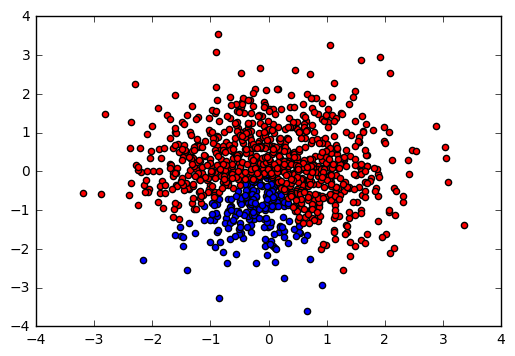

In [448]:
plt.scatter(Xdata[ypred==1.,0],Xdata[ypred==1.,1])
plt.scatter(Xdata[ypred==0.,0],Xdata[ypred==0.,1],c='r')
plt.show()